In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
# Loading Dataset
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [26]:
X_test.shape

(10000, 28, 28)

In [ ]:
# so it has 100000 samples and every sample is a 28x28 grayscale image

In [4]:
y_train.shape

(60000,)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:

y_train.max()

np.uint8(9)

In [9]:
y_train.min()

np.uint8(0)

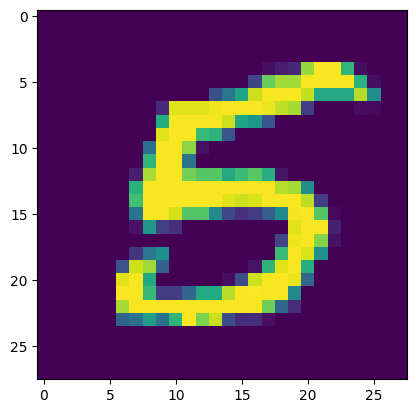

In [18]:
import matplotlib.pyplot as plt
plt.imshow(X_train[20000])

In [20]:
# SO it is multiclass classification problem
# and the array range is from 0 to 9
# I have to scale this from 0-255 to 0-1 

In [19]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [21]:
X_train[4]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [22]:
X_train.min()

np.float32(0.0)

In [23]:
X_train.max()

np.float32(1.0)

In [ ]:
# so scaling is done

In [27]:
X_test.shape

(10000, 28, 28)

In [ ]:
# so it is in two dimensions I need to convert it to one dimension
# I'm going to use Flatten class from keras
# also train my neural network

In [28]:
model = Sequential()

model.add(Flatten(input_shape=(28,28))) # here I use this to convert the 2D images to 1D
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

c:\Users\Rafin\Desktop\House Prices\ds_venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [32]:
history = model.fit(X_train,y_train,epochs=15,validation_split=0.2)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9913 - loss: 0.0250 - val_accuracy: 0.9704 - val_loss: 0.1202
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9928 - loss: 0.0220 - val_accuracy: 0.9728 - val_loss: 0.1263
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9934 - loss: 0.0195 - val_accuracy: 0.9750 - val_loss: 0.1168
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9935 - loss: 0.0181 - val_accuracy: 0.9737 - val_loss: 0.1207
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9949 - loss: 0.0153 - val_accuracy: 0.9724 - val_loss: 0.1300
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9956 - loss: 0.0137 - val_accuracy: 0.9677 - val_loss: 0.1586
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9945 - loss: 0.0156 - val_accuracy: 0.9730 - val_loss: 0.1464
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9959 - loss: 0.0116 - 

In [34]:
# so it done
# My pc taking 5 second to train 1500 parameters. I need to upgrade my pc


In [35]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [38]:
from sklearn.metrics import accuracy_score
y_pred = y_prob.argmax(axis=1)
accuracy_score(y_test,y_pred)

0.9749

In [ ]:
# holly molly 97% it awesome

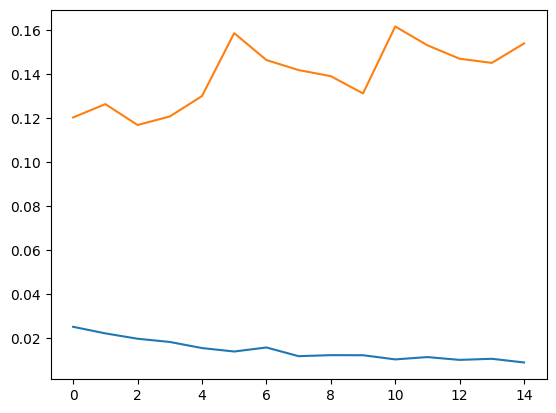

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

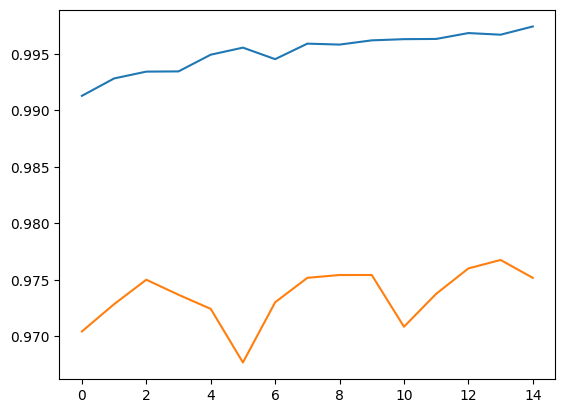

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

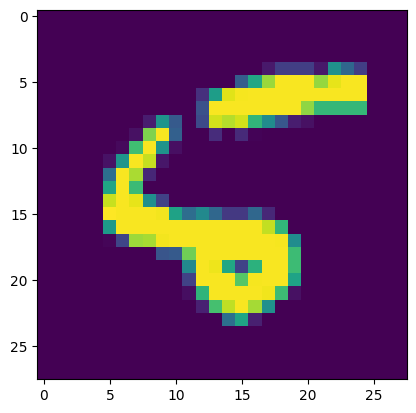

In [42]:
plt.imshow(X_test[8])